C:\Users\mojta\AppData\Local\Temp\ipykernel_7292\2121220366.py:10: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(image_path)
c:\Users\mojta\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


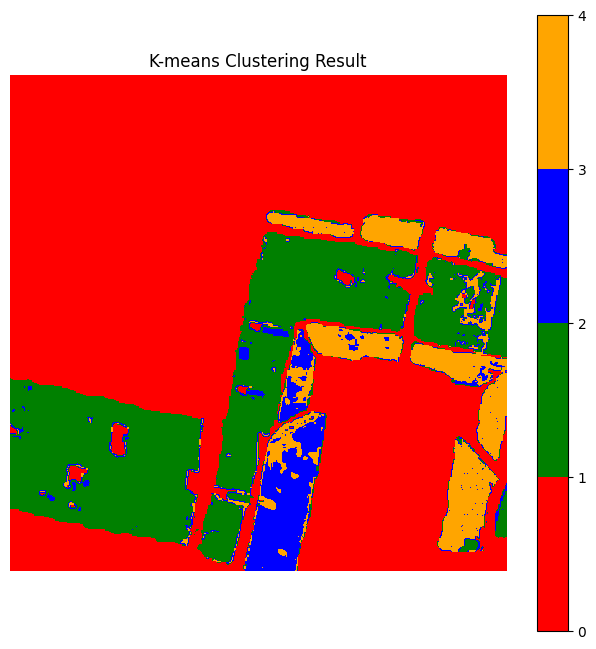

In [25]:
import imageio
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from matplotlib.colors import ListedColormap
import matplotlib.colors as mcolors

# Load the PNG image
image_path = 'C:\\Users\\mojta\\Downloads\\FirstCutOut.png'
image = imageio.imread(image_path)

# Get the shape of the image and reshape it for clustering
height, width, channels = image.shape
pixels = image.reshape(-1, channels)

# Perform K-means clustering
num_clusters = 5  # You can adjust this to change the number of clusters
kmeans = KMeans(n_clusters=num_clusters, random_state=0).fit(pixels)
labels = kmeans.labels_
cluster_centers = kmeans.cluster_centers_

# Reshape the labels to match the original image shape
clustered_image = labels.reshape(height, width)


colors = ['red', 'green', 'blue', 'orange']  # Define colors for each class
cmap = ListedColormap(colors)

bounds = np.arange(np.min(clustered_image) , np.max(clustered_image) + 1, 1)  # Define class boundaries
norm = mcolors.BoundaryNorm(boundaries=bounds, ncolors=cmap.N, clip=False)

# Create a visualization of the clustered image
plt.figure(figsize=(8, 8))
plt.imshow(clustered_image, cmap=cmap, norm=norm)
# Create a colorbar to show the color mapping
cbar = plt.colorbar()


plt.title('K-means Clustering Result')
plt.axis('off')
plt.show()


In [8]:
np.unique(clustered_image)

array([0, 1, 2, 3, 4])

In [27]:
picked_class_pixels = np.count_nonzero(clustered_image == 1)
picked_class_pixels

33359

In [28]:
# Define the zoom level
zoom = 20

# Calculate the scale in meters per pixel
scale_meters_per_pixel = 156543.03392 / (2 ** zoom)

# Convert meters to centimeters
scale_centimeters_per_pixel = scale_meters_per_pixel * 100

print(f"At zoom level {zoom}, 1 centimeter is approximately {scale_centimeters_per_pixel:.2f} pixels.")


At zoom level 20, 1 centimeter is approximately 14.93 pixels.


In [30]:
import math

# Define the zoom level, latitude in degrees, and 1 centimeter in pixels
zoom = 20  # Replace with your desired zoom level
latitude_deg = 52.520008  # berlin's latitude
one_centimeter_pixels = 1  # Replace with the size of 1 centimeter in pixels

# Calculate the scale factor
latitude_rad = math.radians(latitude_deg)
scale_factor = (40008000 / (2 ** zoom * 360)) * math.cos(latitude_rad)

# Calculate the real-world size of 1 centimeter in meters
real_world_size_meters = one_centimeter_pixels / scale_factor

print(f"At zoom level {zoom} and latitude {latitude_deg} degrees, 1 centimeter on Google Maps is approximately {real_world_size_meters:.2f} meters in the real world.")


At zoom level 20 and latitude 52.520008 degrees, 1 centimeter on Google Maps is approximately 15.51 meters in the real world.


at zoom level 20 in Google Maps, approximately 0.0089 pixels represent 1 square meter

SQM of a roof based on the number of pixels: number of pixels x 0.0089

In [34]:
estmiation_of_size = round(picked_class_pixels * 0.0089,2)
estmiation_of_size

296.9